<a href="https://colab.research.google.com/github/yejide/Computational-Drug-Design-using-machine-learning-with-python/blob/main/HCV_Bioactivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Computational Drug Discovery 

---

## **Installing libraries**

Install the ChEMBL web service package so that we can retrieve bioactivity data from the ChEMBL Database.

In [1]:
! pip install chembl_webresource_client

     |████████████████████████████████| 55 kB 1.5 MB/s 
     |████████████████████████████████| 636 kB 10.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.0.1 which is incompatible.


## **Importing libraries**

In [2]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

## **Search for Target protein**

### **Target search for Hepatitis C virus NS5B RNA-dependent RNA polymerase
**

In [3]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('Hepatitis C virus NS5B RNA-dependent RNA polymerase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'Q8JXU8', 'xref_name': None, 'xre...",Hepatitis C virus,Hepatitis C virus NS5B RNA-dependent RNA polym...,54.0,False,CHEMBL5375,"[{'accession': 'Q8JXU8', 'component_descriptio...",SINGLE PROTEIN,11103.0
1,"[{'xref_id': 'Q69422', 'xref_name': None, 'xre...",Hepatitis GB virus B,Hepatitis GB virus B NS5B RNA-dependent RNA po...,46.0,False,CHEMBL5981,"[{'accession': 'Q69422', 'component_descriptio...",SINGLE PROTEIN,39113.0
2,[],Influenza A virus (A/Puerto Rico/8/1934(H1N1)),PA/PB1,36.0,False,CHEMBL3137263,"[{'accession': 'P03433', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,211044.0
3,[],Influenza A virus (strain A/Wilson-Smith/1933 ...,Polymerase acidic protein /RNA-directed RNA po...,36.0,False,CHEMBL3885620,"[{'accession': 'P15659', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,381518.0
4,[],Influenza A virus (strain A/Puerto Rico/8/1934...,RNA-directed RNA polymerase,36.0,False,CHEMBL4523676,"[{'accession': 'P03433', 'component_descriptio...",PROTEIN COMPLEX,211044.0
...,...,...,...,...,...,...,...,...,...
1499,[],Homo sapiens,Mitochondrial complex I (NADH dehydrogenase),0.0,False,CHEMBL2363065,"[{'accession': 'P03923', 'component_descriptio...",PROTEIN COMPLEX,9606.0
1500,[],Escherichia coli,1-deoxy-D-xylulose 5-phosphate reductoisomerase,0.0,False,CHEMBL3421521,"[{'accession': 'W8T2T2', 'component_descriptio...",SINGLE PROTEIN,562.0
1501,[],Homo sapiens,UDP-glucuronosyltransferases (UGTs),0.0,False,CHEMBL4523985,"[{'accession': 'P22310', 'component_descriptio...",PROTEIN FAMILY,9606.0
1502,[],Homo sapiens,Cytochrome P450,0.0,False,CHEMBL4523986,"[{'accession': 'P08684', 'component_descriptio...",PROTEIN FAMILY,9606.0


### **Select and retrieve bioactivity data for *Human Hepatitis C virus NS5B RNA-dependent RNA polymerase* (first entry)**

We will assign the first entry (which corresponds to the target protein, *Human Cytochrome P450 19A1*) to the ***selected_target*** variable 

In [4]:
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL5375'

Here, we will retrieve only bioactivity data for *Breast cancer type 1 susceptibility protein* (CHEMBL5990) that are reported as pChEMBL values.

In [5]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [6]:
df = pd.DataFrame.from_dict(res)

In [7]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,144742,[],CHEMBL750250,Inhibitory activity against NS5B polymerase of...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)c1ccc2c(c1)nc(-c1cccs1)n2C1CCCCC1,None,None,CHEMBL1149223,Bioorg. Med. Chem. Lett.,2004,"{'bei': '16.75', 'le': '0.32', 'lle': '0.50', ...",CHEMBL174629,None,CHEMBL174629,5.47,False,http://www.openphacts.org/units/Nanomolar,350900,=,1,True,=,None,IC50,nM,None,3400.0,CHEMBL5375,Hepatitis C virus,Hepatitis C virus NS5B RNA-dependent RNA polym...,11103,None,None,IC50,uM,UO_0000065,None,3.4
1,None,144746,[],CHEMBL750250,Inhibitory activity against NS5B polymerase of...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)c1ccc2c(c1)nc(-c1ccc(-c3ccc(Cl)cc3)o1)n2...,None,None,CHEMBL1149223,Bioorg. Med. Chem. Lett.,2004,None,CHEMBL355577,None,CHEMBL355577,None,False,http://www.openphacts.org/units/Nanomolar,350915,>,1,True,>,None,IC50,nM,None,30000.0,CHEMBL5375,Hepatitis C virus,Hepatitis C virus NS5B RNA-dependent RNA polym...,11103,None,None,IC50,uM,UO_0000065,None,30.0
2,None,145887,[],CHEMBL750250,Inhibitory activity against NS5B polymerase of...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)c1ccc2c(c1)nc(-c1ccncc1)n2C1CCCCC1,None,None,CHEMBL1149223,Bioorg. Med. Chem. Lett.,2004,"{'bei': '14.84', 'le': '0.27', 'lle': '0.47', ...",CHEMBL174836,None,CHEMBL174836,4.77,False,http://www.openphacts.org/units/Nanomolar,350893,=,1,True,=,None,IC50,nM,None,17000.0,CHEMBL5375,Hepatitis C virus,Hepatitis C virus NS5B RNA-dependent RNA polym...,11103,None,None,IC50,uM,UO_0000065,None,17.0
3,None,147041,[],CHEMBL750250,Inhibitory activity against NS5B polymerase of...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CCC(CC)n1c(-c2ccccn2)nc2cc(C(=O)O)ccc21,Outside typical range,Values for this activity type are unusually la...,CHEMBL1149223,Bioorg. Med. Chem. Lett.,2004,None,CHEMBL175762,None,CHEMBL175762,None,False,http://www.openphacts.org/units/Nanomolar,350878,=,1,True,=,None,IC50,nM,None,139000.0,CHEMBL5375,Hepatitis C virus,Hepatitis C virus NS5B RNA-dependent RNA polym...,11103,None,None,IC50,uM,UO_0000065,None,139.0
4,None,147042,[],CHEMBL750250,Inhibitory activity against NS5B polymerase of...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC1CCCCC1n1c(-c2ccccn2)nc2cc(C(=O)O)ccc21,None,None,CHEMBL1149223,Bioorg. Med. Chem. Lett.,2004,"{'bei': '14.57', 'le': '0.27', 'lle': '0.34', ...",CHEMBL174542,None,CHEMBL174542,4.89,False,http://www.openphacts.org/units/Nanomolar,350881,=,1,True,=,None,IC50,nM,None,13000.0,CHEMBL5375,Hepatitis C virus,Hepatitis C virus NS5B RNA-dependent RNA polym...,11103,None,None,IC50,uM,UO_0000065,None,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1830,None,20696633,[],CHEMBL4627020,Inhibition of HCV NS5B RNA-dependent RNA polym...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C[C@@]1(O)[C@H](F)[C@@H](COP(=O)(O)OP(=O)(O)OP...,None,None,CHEMBL4622986,J Med Chem,2020,"{'bei': '11.50', 'le': '0.26', 'lle': '7.17', ...",CHEMBL4632867,None,CHEMBL4632867,6.20,False,http://www.openphacts.org/units/Nanomolar,3485931,=,1,True,=,None,IC50,nM,None,630.0,CHEMBL5375,Hepatitis C virus,Hepatitis C virus NS5B RNA-depen

Finally we will save the resulting bioactivity data to a CSV file **bioactivity_data.csv**.

In [8]:
df.to_csv('HCV_01_bioactivity_data_raw.csv', index=False)

## **Handling missing data**
If any compounds has missing value for the **standard_value** and **canonical_smiles** column then drop it.

In [9]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,144742,[],CHEMBL750250,Inhibitory activity against NS5B polymerase of...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)c1ccc2c(c1)nc(-c1cccs1)n2C1CCCCC1,None,None,CHEMBL1149223,Bioorg. Med. Chem. Lett.,2004,"{'bei': '16.75', 'le': '0.32', 'lle': '0.50', ...",CHEMBL174629,None,CHEMBL174629,5.47,False,http://www.openphacts.org/units/Nanomolar,350900,=,1,True,=,None,IC50,nM,None,3400.0,CHEMBL5375,Hepatitis C virus,Hepatitis C virus NS5B RNA-dependent RNA polym...,11103,None,None,IC50,uM,UO_0000065,None,3.4
1,None,144746,[],CHEMBL750250,Inhibitory activity against NS5B polymerase of...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)c1ccc2c(c1)nc(-c1ccc(-c3ccc(Cl)cc3)o1)n2...,None,None,CHEMBL1149223,Bioorg. Med. Chem. Lett.,2004,None,CHEMBL355577,None,CHEMBL355577,None,False,http://www.openphacts.org/units/Nanomolar,350915,>,1,True,>,None,IC50,nM,None,30000.0,CHEMBL5375,Hepatitis C virus,Hepatitis C virus NS5B RNA-dependent RNA polym...,11103,None,None,IC50,uM,UO_0000065,None,30.0
2,None,145887,[],CHEMBL750250,Inhibitory activity against NS5B polymerase of...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)c1ccc2c(c1)nc(-c1ccncc1)n2C1CCCCC1,None,None,CHEMBL1149223,Bioorg. Med. Chem. Lett.,2004,"{'bei': '14.84', 'le': '0.27', 'lle': '0.47', ...",CHEMBL174836,None,CHEMBL174836,4.77,False,http://www.openphacts.org/units/Nanomolar,350893,=,1,True,=,None,IC50,nM,None,17000.0,CHEMBL5375,Hepatitis C virus,Hepatitis C virus NS5B RNA-dependent RNA polym...,11103,None,None,IC50,uM,UO_0000065,None,17.0
3,None,147041,[],CHEMBL750250,Inhibitory activity against NS5B polymerase of...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CCC(CC)n1c(-c2ccccn2)nc2cc(C(=O)O)ccc21,Outside typical range,Values for this activity type are unusually la...,CHEMBL1149223,Bioorg. Med. Chem. Lett.,2004,None,CHEMBL175762,None,CHEMBL175762,None,False,http://www.openphacts.org/units/Nanomolar,350878,=,1,True,=,None,IC50,nM,None,139000.0,CHEMBL5375,Hepatitis C virus,Hepatitis C virus NS5B RNA-dependent RNA polym...,11103,None,None,IC50,uM,UO_0000065,None,139.0
4,None,147042,[],CHEMBL750250,Inhibitory activity against NS5B polymerase of...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC1CCCCC1n1c(-c2ccccn2)nc2cc(C(=O)O)ccc21,None,None,CHEMBL1149223,Bioorg. Med. Chem. Lett.,2004,"{'bei': '14.57', 'le': '0.27', 'lle': '0.34', ...",CHEMBL174542,None,CHEMBL174542,4.89,False,http://www.openphacts.org/units/Nanomolar,350881,=,1,True,=,None,IC50,nM,None,13000.0,CHEMBL5375,Hepatitis C virus,Hepatitis C virus NS5B RNA-dependent RNA polym...,11103,None,None,IC50,uM,UO_0000065,None,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1830,None,20696633,[],CHEMBL4627020,Inhibition of HCV NS5B RNA-dependent RNA polym...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C[C@@]1(O)[C@H](F)[C@@H](COP(=O)(O)OP(=O)(O)OP...,None,None,CHEMBL4622986,J Med Chem,2020,"{'bei': '11.50', 'le': '0.26', 'lle': '7.17', ...",CHEMBL4632867,None,CHEMBL4632867,6.20,False,http://www.openphacts.org/units/Nanomolar,3485931,=,1,True,=,None,IC50,nM,None,630.0,CHEMBL5375,Hepatitis C virus,Hepatitis C virus NS5B RNA-depen

In [10]:
len(df2.canonical_smiles.unique())

1390

In [11]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,144742,[],CHEMBL750250,Inhibitory activity against NS5B polymerase of...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)c1ccc2c(c1)nc(-c1cccs1)n2C1CCCCC1,None,None,CHEMBL1149223,Bioorg. Med. Chem. Lett.,2004,"{'bei': '16.75', 'le': '0.32', 'lle': '0.50', ...",CHEMBL174629,None,CHEMBL174629,5.47,False,http://www.openphacts.org/units/Nanomolar,350900,=,1,True,=,None,IC50,nM,None,3400.0,CHEMBL5375,Hepatitis C virus,Hepatitis C virus NS5B RNA-dependent RNA polym...,11103,None,None,IC50,uM,UO_0000065,None,3.4
1,None,144746,[],CHEMBL750250,Inhibitory activity against NS5B polymerase of...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)c1ccc2c(c1)nc(-c1ccc(-c3ccc(Cl)cc3)o1)n2...,None,None,CHEMBL1149223,Bioorg. Med. Chem. Lett.,2004,None,CHEMBL355577,None,CHEMBL355577,None,False,http://www.openphacts.org/units/Nanomolar,350915,>,1,True,>,None,IC50,nM,None,30000.0,CHEMBL5375,Hepatitis C virus,Hepatitis C virus NS5B RNA-dependent RNA polym...,11103,None,None,IC50,uM,UO_0000065,None,30.0
2,None,145887,[],CHEMBL750250,Inhibitory activity against NS5B polymerase of...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)c1ccc2c(c1)nc(-c1ccncc1)n2C1CCCCC1,None,None,CHEMBL1149223,Bioorg. Med. Chem. Lett.,2004,"{'bei': '14.84', 'le': '0.27', 'lle': '0.47', ...",CHEMBL174836,None,CHEMBL174836,4.77,False,http://www.openphacts.org/units/Nanomolar,350893,=,1,True,=,None,IC50,nM,None,17000.0,CHEMBL5375,Hepatitis C virus,Hepatitis C virus NS5B RNA-dependent RNA polym...,11103,None,None,IC50,uM,UO_0000065,None,17.0
3,None,147041,[],CHEMBL750250,Inhibitory activity against NS5B polymerase of...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CCC(CC)n1c(-c2ccccn2)nc2cc(C(=O)O)ccc21,Outside typical range,Values for this activity type are unusually la...,CHEMBL1149223,Bioorg. Med. Chem. Lett.,2004,None,CHEMBL175762,None,CHEMBL175762,None,False,http://www.openphacts.org/units/Nanomolar,350878,=,1,True,=,None,IC50,nM,None,139000.0,CHEMBL5375,Hepatitis C virus,Hepatitis C virus NS5B RNA-dependent RNA polym...,11103,None,None,IC50,uM,UO_0000065,None,139.0
4,None,147042,[],CHEMBL750250,Inhibitory activity against NS5B polymerase of...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC1CCCCC1n1c(-c2ccccn2)nc2cc(C(=O)O)ccc21,None,None,CHEMBL1149223,Bioorg. Med. Chem. Lett.,2004,"{'bei': '14.57', 'le': '0.27', 'lle': '0.34', ...",CHEMBL174542,None,CHEMBL174542,4.89,False,http://www.openphacts.org/units/Nanomolar,350881,=,1,True,=,None,IC50,nM,None,13000.0,CHEMBL5375,Hepatitis C virus,Hepatitis C virus NS5B RNA-dependent RNA polym...,11103,None,None,IC50,uM,UO_0000065,None,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1830,None,20696633,[],CHEMBL4627020,Inhibition of HCV NS5B RNA-dependent RNA polym...,B,None,None,BAO_0000190,BAO_0000357,single protein format,C[C@@]1(O)[C@H](F)[C@@H](COP(=O)(O)OP(=O)(O)OP...,None,None,CHEMBL4622986,J Med Chem,2020,"{'bei': '11.50', 'le': '0.26', 'lle': '7.17', ...",CHEMBL4632867,None,CHEMBL4632867,6.20,False,http://www.openphacts.org/units/Nanomolar,3485931,=,1,True,=,None,IC50,nM,None,630.0,CHEMBL5375,Hepatitis C virus,Hepatitis C virus NS5B RNA-depen

## **Data pre-processing of the bioactivity data**

### **Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame**

In [12]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL174629,O=C(O)c1ccc2c(c1)nc(-c1cccs1)n2C1CCCCC1,3400.0
1,CHEMBL355577,O=C(O)c1ccc2c(c1)nc(-c1ccc(-c3ccc(Cl)cc3)o1)n2...,30000.0
2,CHEMBL174836,O=C(O)c1ccc2c(c1)nc(-c1ccncc1)n2C1CCCCC1,17000.0
3,CHEMBL175762,CCC(CC)n1c(-c2ccccn2)nc2cc(C(=O)O)ccc21,139000.0
4,CHEMBL174542,CC1CCCCC1n1c(-c2ccccn2)nc2cc(C(=O)O)ccc21,13000.0
...,...,...,...
1830,CHEMBL4632867,C[C@@]1(O)[C@H](F)[C@@H](COP(=O)(O)OP(=O)(O)OP...,630.0
1831,CHEMBL4635006,C[C@@]1(F)[C@H](F)[C@@H](COP(=O)(O)OP(=O)(O)OP...,310.0
1832,CHEMBL4639840,C[C@@]1(Cl)[C@H](F)[C@@H](COP(=O)(O)OP(=O)(O)O...,760.0
1833,CHEMBL2403318,Cn1c(C2(NC(=O)c3ccc4c(C5CCCC5)c(-c5ncc(Br)cn5)...,19.0


Saves dataframe to CSV file

In [13]:
df3.to_csv('HCV_02_bioactivity_data_preprocessed.csv', index=False)

### **Label compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**. 

In [14]:
df4 = pd.read_csv('HCV_02_bioactivity_data_preprocessed.csv')

In [15]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [16]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL174629,O=C(O)c1ccc2c(c1)nc(-c1cccs1)n2C1CCCCC1,3400.0,intermediate
1,CHEMBL355577,O=C(O)c1ccc2c(c1)nc(-c1ccc(-c3ccc(Cl)cc3)o1)n2...,30000.0,inactive
2,CHEMBL174836,O=C(O)c1ccc2c(c1)nc(-c1ccncc1)n2C1CCCCC1,17000.0,inactive
3,CHEMBL175762,CCC(CC)n1c(-c2ccccn2)nc2cc(C(=O)O)ccc21,139000.0,inactive
4,CHEMBL174542,CC1CCCCC1n1c(-c2ccccn2)nc2cc(C(=O)O)ccc21,13000.0,inactive
...,...,...,...,...
1385,CHEMBL4632867,C[C@@]1(O)[C@H](F)[C@@H](COP(=O)(O)OP(=O)(O)OP...,630.0,active
1386,CHEMBL4635006,C[C@@]1(F)[C@H](F)[C@@H](COP(=O)(O)OP(=O)(O)OP...,310.0,active
1387,CHEMBL4639840,C[C@@]1(Cl)[C@H](F)[C@@H](COP(=O)(O)OP(=O)(O)O...,760.0,active
1388,CHEMBL2403318,Cn1c(C2(NC(=O)c3ccc4c(C5CCCC5)c(-c5ncc(Br)cn5)...,19.0,active


# Save dataframe to CSV file

In [17]:
df5.to_csv('HCV_03_bioactivity_data_curated.csv', index=False)

In [18]:
! zip HCV.zip *.csv

  adding: HCV_01_bioactivity_data_raw.csv (deflated 92%)
  adding: HCV_02_bioactivity_data_preprocessed.csv (deflated 82%)
  adding: HCV_03_bioactivity_data_curated.csv (deflated 84%)


In [19]:
! ls -l

total 1380
-rw-r--r-- 1 root root 1052268 Sep  8 23:47 HCV_01_bioactivity_data_raw.csv
-rw-r--r-- 1 root root  107047 Sep  8 23:47 HCV_02_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root  119639 Sep  8 23:47 HCV_03_bioactivity_data_curated.csv
-rw-r--r-- 1 root root  122559 Sep  8 23:47 HCV.zip
drwxr-xr-x 1 root root    4096 Sep  1 19:26 sample_data


## **Install conda and rdkit**


In [20]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-09-08 23:47:12--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   152MB/s    in 0.5s    

2021-09-08 23:47:13 (152 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [21]:
cleaneddf5=pd.read_csv('HCV_03_bioactivity_data_curated.csv')
cleaneddf5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL174629,O=C(O)c1ccc2c(c1)nc(-c1cccs1)n2C1CCCCC1,3400.0,intermediate
1,CHEMBL355577,O=C(O)c1ccc2c(c1)nc(-c1ccc(-c3ccc(Cl)cc3)o1)n2...,30000.0,inactive
2,CHEMBL174836,O=C(O)c1ccc2c(c1)nc(-c1ccncc1)n2C1CCCCC1,17000.0,inactive
3,CHEMBL175762,CCC(CC)n1c(-c2ccccn2)nc2cc(C(=O)O)ccc21,139000.0,inactive
4,CHEMBL174542,CC1CCCCC1n1c(-c2ccccn2)nc2cc(C(=O)O)ccc21,13000.0,inactive
...,...,...,...,...
1385,CHEMBL4632867,C[C@@]1(O)[C@H](F)[C@@H](COP(=O)(O)OP(=O)(O)OP...,630.0,active
1386,CHEMBL4635006,C[C@@]1(F)[C@H](F)[C@@H](COP(=O)(O)OP(=O)(O)OP...,310.0,active
1387,CHEMBL4639840,C[C@@]1(Cl)[C@H](F)[C@@H](COP(=O)(O)OP(=O)(O)O...,760.0,active
1388,CHEMBL2403318,Cn1c(C2(NC(=O)c3ccc4c(C5CCCC5)c(-c5ncc(Br)cn5)...,19.0,active


In [22]:
df_no_smiles = cleaneddf5.drop(columns='canonical_smiles')

In [23]:
smiles = []

for i in cleaneddf5.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [24]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL174629,3400.0,intermediate,O=C(O)c1ccc2c(c1)nc(-c1cccs1)n2C1CCCCC1
1,CHEMBL355577,30000.0,inactive,O=C(O)c1ccc2c(c1)nc(-c1ccc(-c3ccc(Cl)cc3)o1)n2...
2,CHEMBL174836,17000.0,inactive,O=C(O)c1ccc2c(c1)nc(-c1ccncc1)n2C1CCCCC1
3,CHEMBL175762,139000.0,inactive,CCC(CC)n1c(-c2ccccn2)nc2cc(C(=O)O)ccc21
4,CHEMBL174542,13000.0,inactive,CC1CCCCC1n1c(-c2ccccn2)nc2cc(C(=O)O)ccc21
...,...,...,...,...
1385,CHEMBL4632867,630.0,active,C[C@@]1(O)[C@H](F)[C@@H](COP(=O)(O)OP(=O)(O)OP...
1386,CHEMBL4635006,310.0,active,C[C@@]1(F)[C@H](F)[C@@H](COP(=O)(O)OP(=O)(O)OP...
1387,CHEMBL4639840,760.0,active,C[C@@]1(Cl)[C@H](F)[C@@H](COP(=O)(O)OP(=O)(O)O...
1388,CHEMBL2403318,19.0,active,Cn1c(C2(NC(=O)c3ccc4c(C5CCCC5)c(-c5ncc(Br)cn5)...


---

Calculate Lipinski descriptors
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:

Molecular weight < 500 Dalton
Octanol-water partition coefficient (LogP) < 5
Hydrogen bond donors < 5
Hydrogen bond acceptors < 10


In [25]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [26]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [27]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,326.421,4.9682,1.0,4.0
1,420.896,6.8201,1.0,4.0
2,321.380,4.3017,1.0,4.0
3,309.369,4.1576,1.0,4.0
4,335.407,4.5477,1.0,4.0
...,...,...,...,...
1385,539.199,-0.9684,7.0,13.0
1386,541.190,0.0088,6.0,12.0
1387,557.645,0.2781,6.0,12.0
1388,653.581,6.8491,2.0,7.0


**Combine DataFrames**
Let's take a look at the 2 DataFrames that will be combined.

In [28]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,326.421,4.9682,1.0,4.0
1,420.896,6.8201,1.0,4.0
2,321.380,4.3017,1.0,4.0
3,309.369,4.1576,1.0,4.0
4,335.407,4.5477,1.0,4.0
...,...,...,...,...
1385,539.199,-0.9684,7.0,13.0
1386,541.190,0.0088,6.0,12.0
1387,557.645,0.2781,6.0,12.0
1388,653.581,6.8491,2.0,7.0


In [29]:
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL174629,3400.0,intermediate,O=C(O)c1ccc2c(c1)nc(-c1cccs1)n2C1CCCCC1
1,CHEMBL355577,30000.0,inactive,O=C(O)c1ccc2c(c1)nc(-c1ccc(-c3ccc(Cl)cc3)o1)n2...
2,CHEMBL174836,17000.0,inactive,O=C(O)c1ccc2c(c1)nc(-c1ccncc1)n2C1CCCCC1
3,CHEMBL175762,139000.0,inactive,CCC(CC)n1c(-c2ccccn2)nc2cc(C(=O)O)ccc21
4,CHEMBL174542,13000.0,inactive,CC1CCCCC1n1c(-c2ccccn2)nc2cc(C(=O)O)ccc21
...,...,...,...,...
1385,CHEMBL4632867,630.0,active,C[C@@]1(O)[C@H](F)[C@@H](COP(=O)(O)OP(=O)(O)OP...
1386,CHEMBL4635006,310.0,active,C[C@@]1(F)[C@H](F)[C@@H](COP(=O)(O)OP(=O)(O)OP...
1387,CHEMBL4639840,760.0,active,C[C@@]1(Cl)[C@H](F)[C@@H](COP(=O)(O)OP(=O)(O)O...
1388,CHEMBL2403318,19.0,active,Cn1c(C2(NC(=O)c3ccc4c(C5CCCC5)c(-c5ncc(Br)cn5)...


Now, let's combine the 2 DataFrame

In [30]:
df_combined = pd.concat([df_clean_smiles,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,standard_value,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL174629,3400.0,intermediate,O=C(O)c1ccc2c(c1)nc(-c1cccs1)n2C1CCCCC1,326.421,4.9682,1.0,4.0
1,CHEMBL355577,30000.0,inactive,O=C(O)c1ccc2c(c1)nc(-c1ccc(-c3ccc(Cl)cc3)o1)n2...,420.896,6.8201,1.0,4.0
2,CHEMBL174836,17000.0,inactive,O=C(O)c1ccc2c(c1)nc(-c1ccncc1)n2C1CCCCC1,321.380,4.3017,1.0,4.0
3,CHEMBL175762,139000.0,inactive,CCC(CC)n1c(-c2ccccn2)nc2cc(C(=O)O)ccc21,309.369,4.1576,1.0,4.0
4,CHEMBL174542,13000.0,inactive,CC1CCCCC1n1c(-c2ccccn2)nc2cc(C(=O)O)ccc21,335.407,4.5477,1.0,4.0
...,...,...,...,...,...,...,...,...
1385,CHEMBL4632867,630.0,active,C[C@@]1(O)[C@H](F)[C@@H](COP(=O)(O)OP(=O)(O)OP...,539.199,-0.9684,7.0,13.0
1386,CHEMBL4635006,310.0,active,C[C@@]1(F)[C@H](F)[C@@H](COP(=O)(O)OP(=O)(O)OP...,541.190,0.0088,6.0,12.0
1387,CHEMBL4639840,760.0,active,C[C@@]1(Cl)[C@H](F)[C@@H](COP(=O)(O)OP(=O)(O)O...,557.645,0.2781,6.0,12.0
1388,CHEMBL2403318,19.0,active,Cn1c(C2(NC(=O)c3ccc4c(C5CCCC5)c(-c5ncc(Br)cn5)...,653.581,6.8491,2.0,7.0


Convert IC50 to pIC50
To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10 −9 
Take the molar value and apply -log10
Delete the standard_value column and create a new pIC50 column

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [31]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [32]:
df_combined.standard_value.describe()


count    1.390000e+03
mean     1.233636e+05
std      2.817884e+06
min      1.000000e-03
25%      1.400000e+02
50%      1.600000e+03
75%      1.121514e+04
max      7.691304e+07
Name: standard_value, dtype: float64

In [33]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [34]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL174629,intermediate,O=C(O)c1ccc2c(c1)nc(-c1cccs1)n2C1CCCCC1,326.421,4.9682,1.0,4.0,3400.0
1,CHEMBL355577,inactive,O=C(O)c1ccc2c(c1)nc(-c1ccc(-c3ccc(Cl)cc3)o1)n2...,420.896,6.8201,1.0,4.0,30000.0
2,CHEMBL174836,inactive,O=C(O)c1ccc2c(c1)nc(-c1ccncc1)n2C1CCCCC1,321.380,4.3017,1.0,4.0,17000.0
3,CHEMBL175762,inactive,CCC(CC)n1c(-c2ccccn2)nc2cc(C(=O)O)ccc21,309.369,4.1576,1.0,4.0,139000.0
4,CHEMBL174542,inactive,CC1CCCCC1n1c(-c2ccccn2)nc2cc(C(=O)O)ccc21,335.407,4.5477,1.0,4.0,13000.0
...,...,...,...,...,...,...,...,...
1385,CHEMBL4632867,active,C[C@@]1(O)[C@H](F)[C@@H](COP(=O)(O)OP(=O)(O)OP...,539.199,-0.9684,7.0,13.0,630.0
1386,CHEMBL4635006,active,C[C@@]1(F)[C@H](F)[C@@H](COP(=O)(O)OP(=O)(O)OP...,541.190,0.0088,6.0,12.0,310.0
1387,CHEMBL4639840,active,C[C@@]1(Cl)[C@H](F)[C@@H](COP(=O)(O)OP(=O)(O)O...,557.645,0.2781,6.0,12.0,760.0
1388,CHEMBL2403318,active,Cn1c(C2(NC(=O)c3ccc4c(C5CCCC5)c(-c5ncc(Br)cn5)...,653.581,6.8491,2.0,7.0,19.0


In [35]:
df_norm.standard_value_norm.describe()

count    1.390000e+03
mean     1.233636e+05
std      2.817884e+06
min      1.000000e-03
25%      1.400000e+02
50%      1.600000e+03
75%      1.121514e+04
max      7.691304e+07
Name: standard_value_norm, dtype: float64

In [36]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL174629,intermediate,O=C(O)c1ccc2c(c1)nc(-c1cccs1)n2C1CCCCC1,326.421,4.9682,1.0,4.0,5.468521
1,CHEMBL355577,inactive,O=C(O)c1ccc2c(c1)nc(-c1ccc(-c3ccc(Cl)cc3)o1)n2...,420.896,6.8201,1.0,4.0,4.522879
2,CHEMBL174836,inactive,O=C(O)c1ccc2c(c1)nc(-c1ccncc1)n2C1CCCCC1,321.380,4.3017,1.0,4.0,4.769551
3,CHEMBL175762,inactive,CCC(CC)n1c(-c2ccccn2)nc2cc(C(=O)O)ccc21,309.369,4.1576,1.0,4.0,3.856985
4,CHEMBL174542,inactive,CC1CCCCC1n1c(-c2ccccn2)nc2cc(C(=O)O)ccc21,335.407,4.5477,1.0,4.0,4.886057
...,...,...,...,...,...,...,...,...
1385,CHEMBL4632867,active,C[C@@]1(O)[C@H](F)[C@@H](COP(=O)(O)OP(=O)(O)OP...,539.199,-0.9684,7.0,13.0,6.200659
1386,CHEMBL4635006,active,C[C@@]1(F)[C@H](F)[C@@H](COP(=O)(O)OP(=O)(O)OP...,541.190,0.0088,6.0,12.0,6.508638
1387,CHEMBL4639840,active,C[C@@]1(Cl)[C@H](F)[C@@H](COP(=O)(O)OP(=O)(O)O...,557.645,0.2781,6.0,12.0,6.119186
1388,CHEMBL2403318,active,Cn1c(C2(NC(=O)c3ccc4c(C5CCCC5)c(-c5ncc(Br)cn5)...,653.581,6.8491,2.0,7.0,7.721246


In [37]:
df_final.to_csv('HCV_04_bioactivity_data_3class_pIC50.csv')

Removing the 'intermediate' bioactivity class
Here, we will be removing the intermediate class from our data set.

In [38]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL355577,inactive,O=C(O)c1ccc2c(c1)nc(-c1ccc(-c3ccc(Cl)cc3)o1)n2...,420.896,6.8201,1.0,4.0,4.522879
2,CHEMBL174836,inactive,O=C(O)c1ccc2c(c1)nc(-c1ccncc1)n2C1CCCCC1,321.380,4.3017,1.0,4.0,4.769551
3,CHEMBL175762,inactive,CCC(CC)n1c(-c2ccccn2)nc2cc(C(=O)O)ccc21,309.369,4.1576,1.0,4.0,3.856985
4,CHEMBL174542,inactive,CC1CCCCC1n1c(-c2ccccn2)nc2cc(C(=O)O)ccc21,335.407,4.5477,1.0,4.0,4.886057
5,CHEMBL173718,inactive,CC(C)=Cc1nc2cc(C(=O)O)ccc2n1C1CCCCC1,298.386,4.6629,1.0,3.0,4.721246
...,...,...,...,...,...,...,...,...
1385,CHEMBL4632867,active,C[C@@]1(O)[C@H](F)[C@@H](COP(=O)(O)OP(=O)(O)OP...,539.199,-0.9684,7.0,13.0,6.200659
1386,CHEMBL4635006,active,C[C@@]1(F)[C@H](F)[C@@H](COP(=O)(O)OP(=O)(O)OP...,541.190,0.0088,6.0,12.0,6.508638
1387,CHEMBL4639840,active,C[C@@]1(Cl)[C@H](F)[C@@H](COP(=O)(O)OP(=O)(O)O...,557.645,0.2781,6.0,12.0,6.119186
1388,CHEMBL2403318,active,Cn1c(C2(NC(=O)c3ccc4c(C5CCCC5)c(-c5ncc(Br)cn5)...,653.581,6.8491,2.0,7.0,7.721246


In [39]:
df_2class.to_csv('HCV_05_bioactivity_data_2class_pIC50.csv')

Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

In [40]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

Frequency plot of the 2 bioactivity classes

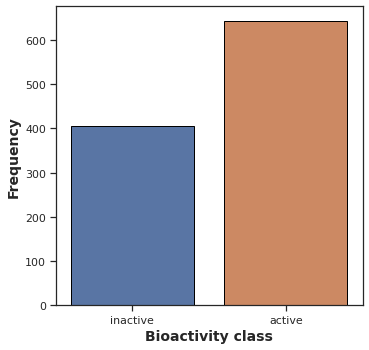

In [41]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

Scatter plot of MW versus LogP
It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

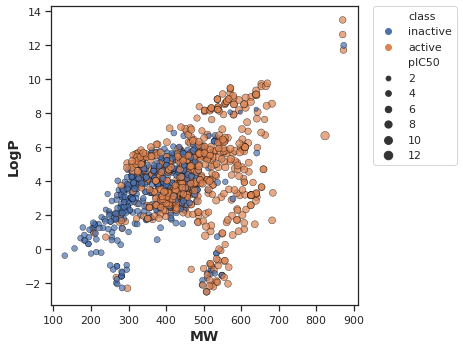

In [42]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

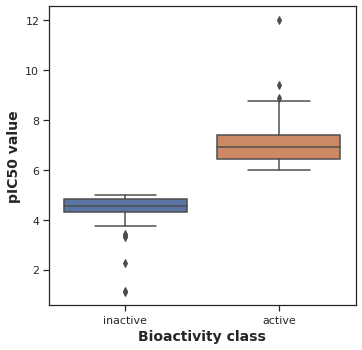

In [43]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

Statistical analysis | Mann-Whitney U Test

In [44]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [45]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,2.020095e-164,0.05,Different distribution (reject H0)


MW

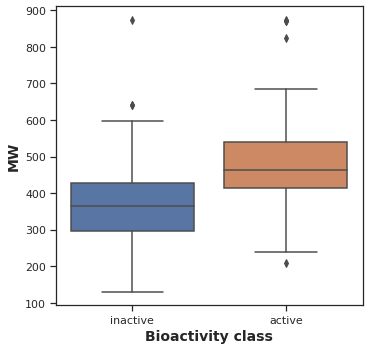

In [46]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [47]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,51697.5,2.703325e-61,0.05,Different distribution (reject H0)


LogP

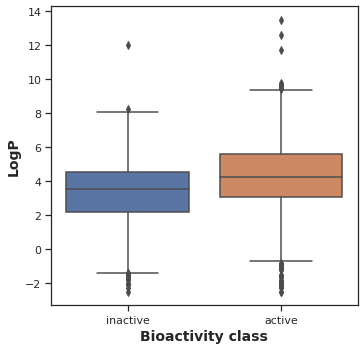

In [48]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [49]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,93802.0,9.085761e-15,0.05,Different distribution (reject H0)


NumHDonors

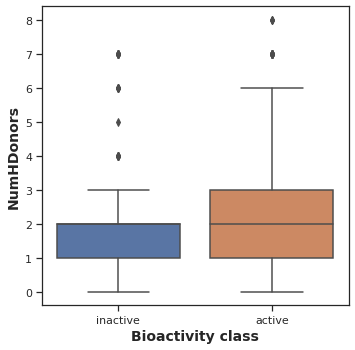

In [50]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [51]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,107907.5,3.952215e-07,0.05,Different distribution (reject H0)


NumHAcceptors

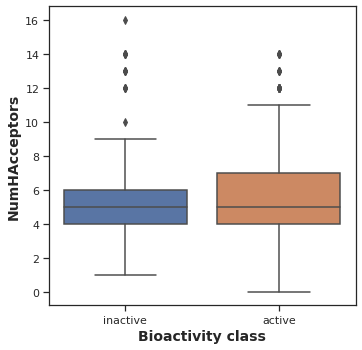

In [52]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [53]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,105578.0,6.910167e-08,0.05,Different distribution (reject H0)


#Interpretation of Statistical Results

# Box Plots
pIC50 values
Taking a look at pIC50 values, the actives and inactives displayed statistically significant difference, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

Lipinski's descriptors
All of the 4 Lipinski's descriptors exhibited statistically significant difference between the actives and inactives.

In [54]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_LogP.pdf (deflated 38%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: plot_MW_vs_LogP.pdf (deflated 4%)
  adding: plot_MW.pdf (deflated 38%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: HCV_02_bioactivity_data_preprocessed.csv (deflated 82%)
  adding: HCV_04_bioactivity_data_3class_pIC50.csv (deflated 79%)
  adding: HCV_03_bioactivity_data_curated.csv (deflated 84%)
  adding: HCV_01_bioactivity_data_raw.csv (deflated 92%)
  adding: plot_ic50.pdf (deflated 38%)
  adding: mannwhitneyu_MW.csv (deflated 7%)
  adding: mannwhitneyu_LogP.csv (deflated 7%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: HCV_05_bioactivity_data_2class_pIC50.csv (deflated 78%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)


Calculating molecular fingerprints using padelpy
Install padelpy¶

In [55]:
! pip install padelpy

     |████████████████████████████████| 20.9 MB 6.7 MB/s 


Prepare fingerprint XML
Download fingerprint XML files¶

In [66]:

!wget https://github.com/yejide/Computational-Drug-Design-using-machine-learning-with-python/blob/main/fingerprints_xml.zip
#! unzip fingerprints_xml.zip

--2021-09-09 00:07:18--  https://github.com/yejide/Computational-Drug-Design-using-machine-learning-with-python/blob/main/fingerprints_xml.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘fingerprints_xml.zip.1’

fingerprints_xml.zi     [ <=>                ] 128.09K  --.-KB/s    in 0.08s   

2021-09-09 00:07:18 (1.57 MB/s) - ‘fingerprints_xml.zip.1’ saved [131165]



In [68]:
! unzip fingerprints_xml.zip

Archive:  fingerprints_xml.zip
  inflating: AtomPairs2DFingerprintCount.xml  
  inflating: AtomPairs2DFingerprinter.xml  
  inflating: EStateFingerprinter.xml  
  inflating: ExtendedFingerprinter.xml  
  inflating: Fingerprinter.xml       
  inflating: GraphOnlyFingerprinter.xml  
  inflating: KlekotaRothFingerprintCount.xml  
  inflating: KlekotaRothFingerprinter.xml  
  inflating: MACCSFingerprinter.xml  
  inflating: PubchemFingerprinter.xml  
  inflating: SubstructureFingerprintCount.xml  
  inflating: SubstructureFingerprinter.xml  


List and sort fingerprint XML files

In [69]:
import glob
xml_files = glob.glob("*.xml")
xml_files.sort()
xml_files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'KlekotaRothFingerprintCount.xml',
 'KlekotaRothFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [70]:
FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

Create a dictionary


In [71]:
fp = dict(zip(FP_list, xml_files))
fp

{'AtomPairs2D': 'AtomPairs2DFingerprinter.xml',
 'AtomPairs2DCount': 'AtomPairs2DFingerprintCount.xml',
 'CDK': 'Fingerprinter.xml',
 'CDKextended': 'ExtendedFingerprinter.xml',
 'CDKgraphonly': 'GraphOnlyFingerprinter.xml',
 'EState': 'EStateFingerprinter.xml',
 'KlekotaRoth': 'KlekotaRothFingerprinter.xml',
 'KlekotaRothCount': 'KlekotaRothFingerprintCount.xml',
 'MACCS': 'MACCSFingerprinter.xml',
 'PubChem': 'PubchemFingerprinter.xml',
 'Substructure': 'SubstructureFingerprinter.xml',
 'SubstructureCount': 'SubstructureFingerprintCount.xml'}

In [72]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df_2class[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [73]:
! cat molecule.smi | head -5

O=C(O)c1ccc2c(c1)nc(-c1ccc(-c3ccc(Cl)cc3)o1)n2C1CCCCC1	CHEMBL355577
O=C(O)c1ccc2c(c1)nc(-c1ccncc1)n2C1CCCCC1	CHEMBL174836
CCC(CC)n1c(-c2ccccn2)nc2cc(C(=O)O)ccc21	CHEMBL175762
CC1CCCCC1n1c(-c2ccccn2)nc2cc(C(=O)O)ccc21	CHEMBL174542
CC(C)=Cc1nc2cc(C(=O)O)ccc2n1C1CCCCC1	CHEMBL173718


In [74]:
 ! cat molecule.smi | wc -l

1049


# Calculate fingerprint descriptors

Calculate descriptors
There are 12 fingerprint types in PaDEL. To calculate all 12, make sure to make adjustments to the descriptortypes input argument to any of the ones in the fp dictionary variable as shown above, e.g. SubstructureFingerprintCount.xml

In [75]:
from padelpy import padeldescriptor

fingerprint = 'Substructure'

fingerprint_output_file = ''.join([fingerprint,'.csv']) #Substructure.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir='molecule.smi', 
                d_file=fingerprint_output_file, #'Substructure.csv'
                #descriptortypes='SubstructureFingerprint.xml', 
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

# Display Calculated PaDEL descriptors

In [76]:
descriptors = pd.read_csv(fingerprint_output_file)
descriptors

,Name,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,SubFP10,SubFP11,SubFP12,SubFP13,SubFP14,SubFP15,SubFP16,SubFP17,SubFP18,SubFP19,SubFP20,SubFP21,SubFP22,SubFP23,SubFP24,SubFP25,SubFP26,SubFP27,SubFP28,SubFP29,SubFP30,SubFP31,SubFP32,SubFP33,SubFP34,SubFP35,SubFP36,SubFP37,SubFP38,SubFP39,...,SubFP268,SubFP269,SubFP270,SubFP271,SubFP272,SubFP273,SubFP274,SubFP275,SubFP276,SubFP277,SubFP278,SubFP279,SubFP280,SubFP281,SubFP282,SubFP283,SubFP284,SubFP285,SubFP286,SubFP287,SubFP288,SubFP289,SubFP290,SubFP291,SubFP292,SubFP293,SubFP294,SubFP295,SubFP296,SubFP297,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307
0,CHEMBL174836,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,CHEMBL355577,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,CHEMBL175762,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,CHEMBL174542,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,CHEMBL173718,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,CHEMBL4635006,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1045,CHEMBL4632867,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1046,CHEMBL4639840,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1047,CHEMBL2403318,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,

# Preparing the X and Y Data Matrices

In [77]:
X=descriptors.drop('Name',axis=1)
X


,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,SubFP10,SubFP11,SubFP12,SubFP13,SubFP14,SubFP15,SubFP16,SubFP17,SubFP18,SubFP19,SubFP20,SubFP21,SubFP22,SubFP23,SubFP24,SubFP25,SubFP26,SubFP27,SubFP28,SubFP29,SubFP30,SubFP31,SubFP32,SubFP33,SubFP34,SubFP35,SubFP36,SubFP37,SubFP38,SubFP39,SubFP40,...,SubFP268,SubFP269,SubFP270,SubFP271,SubFP272,SubFP273,SubFP274,SubFP275,SubFP276,SubFP277,SubFP278,SubFP279,SubFP280,SubFP281,SubFP282,SubFP283,SubFP284,SubFP285,SubFP286,SubFP287,SubFP288,SubFP289,SubFP290,SubFP291,SubFP292,SubFP293,SubFP294,SubFP295,SubFP296,SubFP297,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1045,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1046,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1047,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0


In [78]:
np.isnan(X)


,SubFP1,SubFP2,SubFP3,SubFP4,SubFP5,SubFP6,SubFP7,SubFP8,SubFP9,SubFP10,SubFP11,SubFP12,SubFP13,SubFP14,SubFP15,SubFP16,SubFP17,SubFP18,SubFP19,SubFP20,SubFP21,SubFP22,SubFP23,SubFP24,SubFP25,SubFP26,SubFP27,SubFP28,SubFP29,SubFP30,SubFP31,SubFP32,SubFP33,SubFP34,SubFP35,SubFP36,SubFP37,SubFP38,SubFP39,SubFP40,...,SubFP268,SubFP269,SubFP270,SubFP271,SubFP272,SubFP273,SubFP274,SubFP275,SubFP276,SubFP277,SubFP278,SubFP279,SubFP280,SubFP281,SubFP282,SubFP283,SubFP284,SubFP285,SubFP286,SubFP287,SubFP288,SubFP289,SubFP290,SubFP291,SubFP292,SubFP293,SubFP294,SubFP295,SubFP296,SubFP297,SubFP298,SubFP299,SubFP300,SubFP301,SubFP302,SubFP303,SubFP304,SubFP305,SubFP306,SubFP307
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1045,False,False,False,False,False,False,False,False,False,False,False,False,

In [79]:
np.where(np.isnan(X))


(array([135, 135, 135, ..., 138, 138, 138]),
 array([  0,   1,   2, ..., 304, 305, 306]))

In [80]:
X=np.nan_to_num(X)
X

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.]])

# Y variable

In [81]:
Y=df_2class['pIC50']
Y

1       4.522879
2       4.769551
3       3.856985
4       4.886057
5       4.721246
          ...   
1385    6.200659
1386    6.508638
1387    6.119186
1388    7.721246
1389    8.301030
Name: pIC50, Length: 1049, dtype: float64

# 3.4. Remove low variance features

In [82]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [83]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [93]:
X_train.shape, Y_train.shape

((839, 11), (839,))

In [85]:
X_test.shape, Y_test.shape

((210, 11), (210,))

# 5. Building a Regression Model using Random Forest

In [86]:
model = RandomForestRegressor(n_estimators=100,random_state=50)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.27330804579486534

In [88]:
Y_pred = model.predict(X_test)
Y_pred

array([7.01216522, 5.8017633 , 5.98449765, 6.77436983, 6.03162967,
       5.15262433, 5.84718898, 4.83379568, 4.21140657, 4.45223394,
       6.25537329, 6.25537329, 5.79998993, 6.42258865, 4.65990557,
       5.77951617, 7.19061059, 7.04475258, 7.16950946, 4.74563971,
       4.45048826, 5.53033893, 4.83379568, 6.77436983, 7.05936111,
       5.79479956, 5.69855314, 7.58598982, 7.19061059, 5.59977651,
       4.44697317, 5.10669537, 5.69855314, 5.53033893, 6.54973636,
       5.89952573, 5.79998993, 5.61599522, 7.4293654 , 4.65990557,
       6.42258865, 7.30021792, 4.66147094, 5.44102836, 6.46643473,
       4.57738526, 4.32041615, 7.05936111, 6.52081956, 4.65245649,
       5.52279378, 5.79998993, 5.69855314, 5.02661792, 4.88042181,
       6.77436983, 6.31269899, 5.8017633 , 5.08159618, 6.46869757,
       5.49060692, 4.83379568, 4.66147094, 5.69855314, 5.6277955 ,
       5.08159618, 6.42258865, 7.4293654 , 7.37863192, 4.57335063,
       6.52081956, 6.03162967, 6.52081956, 5.69855314, 7.00393

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

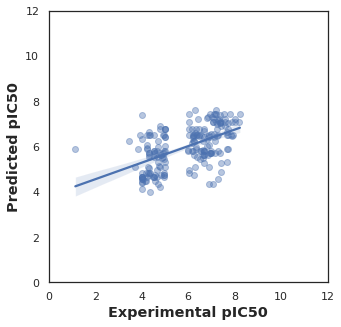

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [102]:
import pickle
with open('modelregression.pickle', 'wb') as dump_var:
    pickle.dump(model, dump_var)

In [91]:
! pip install lazypredict

     |████████████████████████████████| 82 kB 712 kB/s 
     |████████████████████████████████| 14.5 MB 7.8 kB/s 
     |████████████████████████████████| 6.8 MB 14.0 MB/s 
     |████████████████████████████████| 25.9 MB 878 bytes/s 
     |████████████████████████████████| 10.1 MB 18.0 MB/s 
     |████████████████████████████████| 302 kB 54.1 MB/s 
     |████████████████████████████████| 1.2 MB 25.0 MB/s 
     |████████████████████████████████| 269 kB 39.8 MB/s 
     |████████████████████████████████| 127.6 MB 6.5 kB/s 
     |████████████████████████████████| 248 kB 38.4 MB/s 
     |████████████████████████████████| 72 kB 821 kB/s 
     |████████████████████████████████| 51 kB 153 kB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 40 kB 4.5 MB/s 
     |████████████████████████████████| 97 kB 5.8 MB/s 
     |████████████████████████████████| 67 kB 4.6 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl siz

In [94]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


# Compare ML algorithms

In [95]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 97%|█████████▋| 37/38 [00:04<00:00,  8.80it/s]

[00:25:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 38/38 [00:00<00:00, 111848.11it/s]


In [96]:
import pickle
with open('allmodelregression.pickle', 'wb') as dump_var:
    pickle.dump(clf, dump_var)


In [98]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GaussianProcessRegressor,0.57,0.58,0.86,0.16
DecisionTreeRegressor,0.57,0.58,0.86,0.03
ExtraTreeRegressor,0.57,0.58,0.86,0.02
ExtraTreesRegressor,0.57,0.58,0.86,0.24
RandomForestRegressor,0.56,0.56,0.87,0.25
BaggingRegressor,0.54,0.55,0.88,0.03
LGBMRegressor,0.49,0.49,0.94,0.06
HistGradientBoostingRegressor,0.49,0.49,0.94,0.37
NuSVR,0.44,0.45,0.98,0.13


[(0.0, 1.0)]

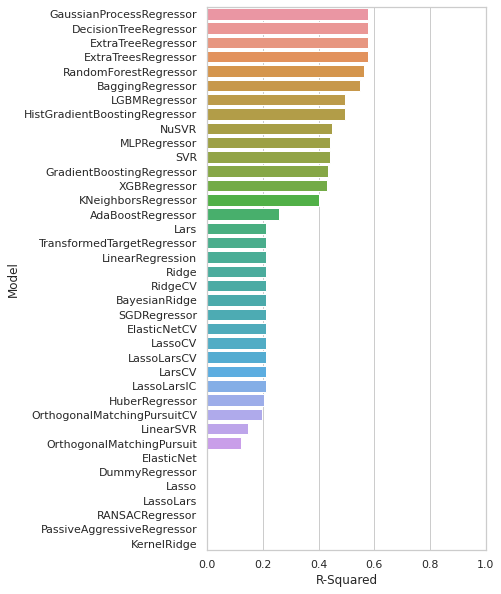

In [99]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

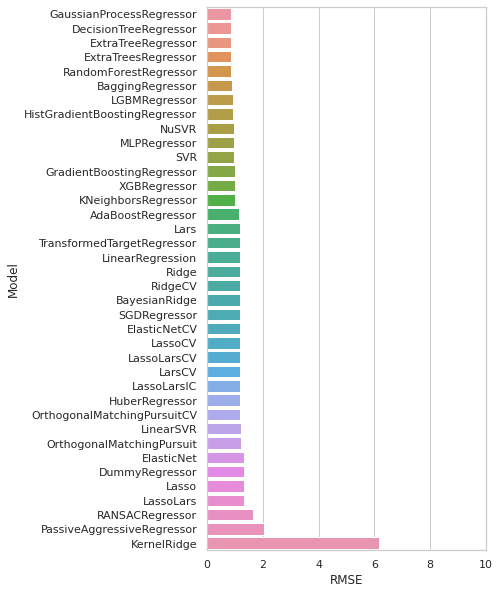

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

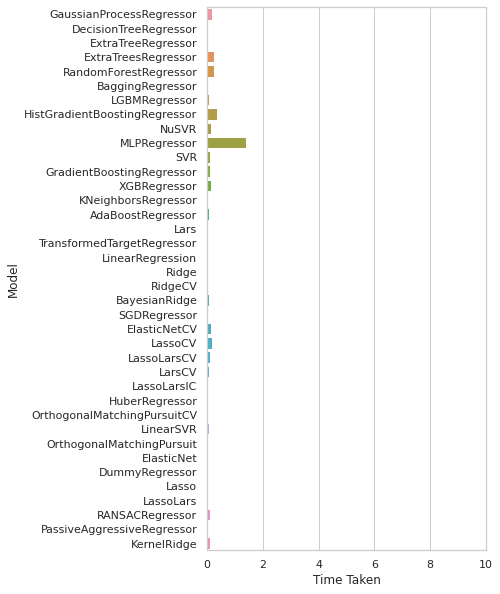

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))